In [1]:
#modeling

In [2]:
#导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern, WhiteKernel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# 加载数据
# 特征和目标变量
# feature_cols = ['iBite', 'specimen', 'amplification','head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l',
#                            'head_w_body_l_ratio', 'head_volume', 'wing_body_ratio', 'latitude', 'longitude', 'country']
# 加载数据
data_cleaned = pd.read_csv('./iBite_table_processed.csv')

# 特征和目标变量
# 直接使用经纬度作为特征
X = data_cleaned[['latitude', 'longitude']]

# 结合其他特征
X = pd.concat([X, data_cleaned[['species' ,'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l']]], axis=1)

# 用于后续模型训练
y = data_cleaned['iBite']


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X

,latitude,longitude,species,head.w,head.h,head.l,th.w,body.l,wing.l
0,-1.235132,1.425063,0.764406,-0.262986,-0.142677,-0.766951,-0.430514,0.043552,0.660228
1,-1.235132,1.425063,0.764406,-0.262986,-0.142677,-0.766951,-0.430514,0.043552,0.660228
2,-1.235132,1.425063,0.776395,-0.127646,-0.076605,-0.734680,-0.290133,0.348621,0.762769
3,-1.402920,1.462618,0.764406,-0.184905,0.016674,-0.721772,-0.094451,-0.048041,0.687047
4,0.977303,-0.279847,1.183999,-0.247370,-0.088265,-0.979938,0.224597,-0.319934,-1.155538
...,...,...,...,...,...,...,...,...,...
1350,0.979260,-0.279480,0.045105,-1.210370,-1.157081,-0.534602,-1.213245,-0.751934,-0.413298
1351,0.979260,-0.279480,0.045105,-1.184343,-1.133761,-0.528148,-1.208991,-0.769243,-0.442483
1352,0.979260,-0.279480,0.045105,-1.231191,-1.125988,-0.534602,-1.196229,-0.810351,-0.458258
1353,0.979260,-0.279480,0.045105,-1.278040,-1.129874,-0.612052,-1.145181,-0.824775,-0.516628


Optimized kernel: 0.61**2 * RBF(length_scale=0.51) + WhiteKernel(noise_level=0.53)
GPR MSE: 0.7425, R2: 0.3041


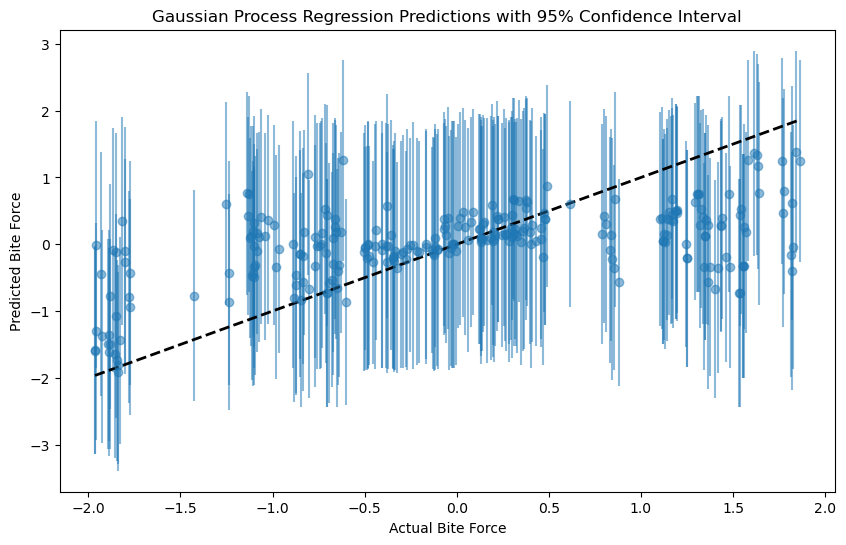

In [14]:
#gp
# 定义核函数
kernel = C(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)

# 训练模型
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gpr.fit(X_train, y_train)

# 输出核函数参数
print(f"Optimized kernel: {gpr.kernel_}")

# 模型预测
y_pred, y_std = gpr.predict(X_test, return_std=True)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'GPR MSE: {mse:.4f}, R2: {r2:.4f}')

# 可视化预测结果与不确定性
# 为了简化，只绘制预测值与实际值的散点图
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_pred, yerr=1.96 * y_std, fmt='o', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Bite Force')
plt.ylabel('Predicted Bite Force')
plt.title('Gaussian Process Regression Predictions with 95% Confidence Interval')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 线性回归模型
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 预测
y_pred_lr = lr_model.predict(X_test)

# 模型评估
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}')

# 随机森林回归模型
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 模型评估
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}')

# 支持向量机回归
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# 预测
y_pred_svr = svr_model.predict(X_test)

# 模型评估
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr:.4f}, R2: {r2_svr:.4f}')


Linear Regression MSE: 0.0000, R2: 1.0000
Random Forest MSE: 0.0000, R2: 1.0000
SVR MSE: 0.0095, R2: 0.9911


In [6]:
from sklearn.model_selection import GridSearchCV

# 随机森林
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R2 score: {grid_search.best_score_:.4f}')

# 使用最佳参数重新训练模型
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# 模型评估
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Optimized Random Forest MSE: {mse_best_rf:.4f}, R2: {r2_best_rf:.4f}')


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best R2 score: 0.9923
Optimized Random Forest MSE: 0.0045, R2: 0.9958


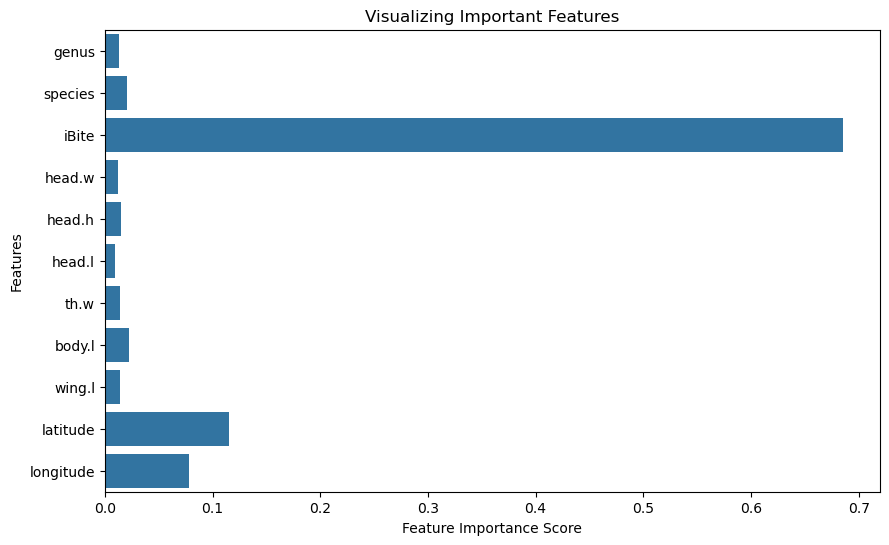

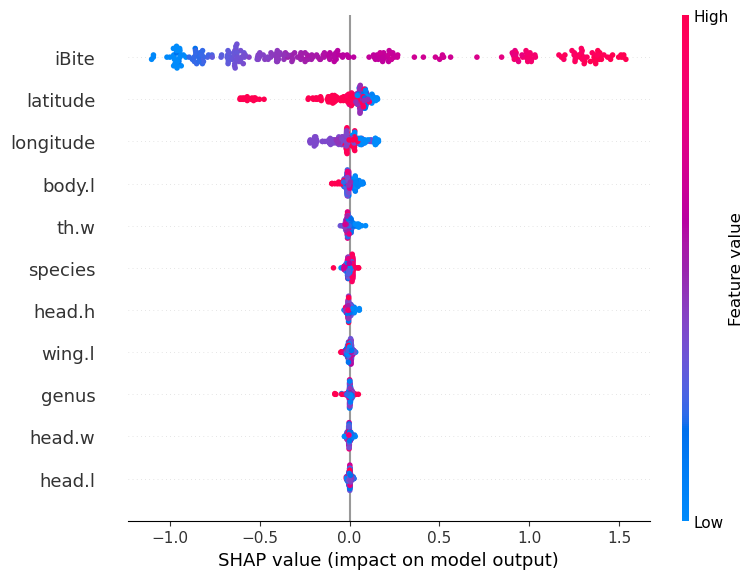

In [7]:
# 特征重要性（适用于树模型）
importances = best_rf_model.feature_importances_
feature_names = feature_cols

# 可视化特征重要性
assert len(importances) == len(feature_names), "Feature importance and feature names lengths do not match!"

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# 使用 SHAP 值（适用于任何模型）
import shap

# 创建 SHAP 解释器
explainer = shap.Explainer(best_rf_model)
shap_values = explainer(X_test)

# 可视化 SHAP 值
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 使用主成分分析降维到2维，便于可视化
# pca = PCA(n_components=min(X.shape[0], X.shape[1]))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 确定聚类数量（可以使用肘部法或轮廓系数）
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)
clusters = kmeans.labels_

# 将聚类结果添加到数据中
data_cleaned['cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.title('KMeans Clusters (n=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


NameError: name 'data_cleaned' is not defined

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# 构建深度学习模型
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 回归问题输出一个值

# 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# 评估模型
loss, mae = model.evaluate(X_test, y_test)
# 根据实际的 MAE 值
print(f'Deep Learning Model MAE: {mae:.4f}')

# 可视化训练过程
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
